<a href="https://colab.research.google.com/github/Raniyahlutfi/Project-JST-PlayNetwork/blob/main/KELOMPOK_4_PlayNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DETEKSI PENYAKIT DIABETES MENGGUNAKAN ALGORITMA EXTREME LEARNING MACHINE (ELM) DENGAN INISIALISASI NGUYEN WIDROW

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import warnings

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')

In [ ]:
def elm_fit(X, target, h, W=None, random_state=42):
    np.random.seed(random_state)

    start_time = time.time()
    # Inisialisasi bobot menggunakan metode Nguyen-Widrow
    Vij = np.random.uniform(-1, 1, size=(h, X.shape[1]))

    # Menentukan nilai beta pada metode Nguyen-Widrow
    beta = 0.7 * h ** (1 / X.shape[1])

    # Menghasilkan bobot dengan distribusi acak yang mematuhi metode Nguyen-Widrow
    W = beta * Vij / np.linalg.norm(Vij, axis=1, keepdims=True)

    # Hitung keluaran hidden layer
    Hinit = X @ W.T
    H = 1 / (1 + np.exp(-Hinit))

    # Ubah urutan keluaran hidden layer
    Ht = H.T

    # Pseudo-invers dari keluaran transposed hidden layer
    Hp = np.linalg.inv(Ht @ H) @ Ht

    # Hitung bobot keluaran
    beta = Hp @ target

    # Hitung prediksi keluaran
    y = H @ beta

    # Hitung Mean Squared Error
    mse = np.mean((y - target) ** 2)

    # Hitung waktu eksekusi
    execution = time.time()- start_time
    print("Waktu eksekusi: %s detik" % execution)

    # Mengembalikan bobot, bobot keluaran, dan MSE
    return W, beta, mse

In [ ]:
def elm_predict(X, W, b, round_output=False):
    # Hitung keluaran layer output
    Hinit = X @ W.T
    H = 1 / (1 + np.exp(-Hinit))

    # Hitung prediksi keluaran
    y = H @ b

    # Secara opsional membulatkan nilai keluaran
    if round_output:
        y = [int(round(x)) for x in y]

    # Mengembalikan hasil prediksi
    return y

In [ ]:
# Loading data
data = pd.read_csv('./diabetes_prediction_dataset.csv')

# Melihat 5 data teratas
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
# Preprocessing kolom dengan tipe data object

# Memisahkan kolom dengan tipe data object
data_obj = data.select_dtypes(include=['object']).copy()

# Menginstansiasi OneHotEncoder
ohe = OneHotEncoder(sparse=False)

# Mengubah data kategorikal menjadi numerikal dengan OHE
data_ohe = pd.DataFrame(ohe.fit_transform(data_obj), columns=ohe.get_feature_names_out(data_obj.columns))

# Menghapus kolom dengan tipe data object pada data asli
data.drop(data_obj.columns, axis=1, inplace=True)

# Menggabungkan data asli dengan data hasil OHE
data = pd.concat([data, data_ohe], axis=1)

# Melihat 5 data teratas
data.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,54.0,0,0,27.32,6.6,80,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,28.0,0,0,27.32,5.7,158,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,36.0,0,0,23.45,5.0,155,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,76.0,1,1,20.14,4.8,155,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Preprocessing kolom dengan tipe data number

# Menskalakan data numerikal dengan min max scaler
data[["age", "bmi", "HbA1c_level", "blood_glucose_level"]] = minmax_scale(data[["age", "bmi", "HbA1c_level", "blood_glucose_level"]])

# Menvalidasi hasil scaling.
# Nilai minimum dan maksimum harus 0 dan 1 untuk kolom ["age", "bmi", "HbA1c_level", "blood_glucose_level"]
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000
mean,0.523096,0.07485,0.039420,0.202040,0.368638,0.263900,0.085000,0.585520,0.414300,0.000180,0.358160,0.092860,0.040040,0.093520,0.35095,0.06447
std,0.281742,0.26315,0.194593,0.077460,0.194668,0.185037,0.278883,0.492635,0.492603,0.013415,0.479462,0.290238,0.196054,0.291161,0.47727,0.24559
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
25%,0.299299,0.00000,0.000000,0.158964,0.236364,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
50%,0.537037,0.00000,0.000000,0.202031,0.418182,0.272727,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
75%,0.749750,0.00000,0.000000,0.228408,0.490909,0.359091,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.00000,0.00000
max,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000


In [ ]:
# Memisahkan data menjadi data dan target
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Memisahkan data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
best_acc = (0, 0)
hasil = []

# Mencoba-coba hidden layer dari 10 sampai 200 dengan interval 5
for hidden_layer in range(10, 201, 5):
    print("Jumlah hidden layer: %s" % hidden_layer)

    # Melatih model
    W, b, mse = elm_fit(X_train, y_train, hidden_layer)

    # Melakukan prediksi
    output = elm_predict(X_test, W, b, round_output=True)

    # Menghitung akurasi
    akurasi = accuracy_score(y_test, output)
    print("Akurasi: %s" % akurasi)
    print()

    # Jika akurasi lebih tinggi dari akurasi terbaik sebelumnya, maka akurasi terbaik akan diganti
    if akurasi > best_acc[1]:

        # Merubah akurasi terbaik
        best_acc = (hidden_layer, akurasi)

    # Menyimpan hasil
    hasil.append((hidden_layer, akurasi))

print("Jumlah hidden layer terbaik: %s" % best_acc[0])
print("Akurasi terbaik: %s" % best_acc[1])

Jumlah hidden layer: 10
Waktu eksekusi: 0.04200124740600586 detik
Akurasi: 0.935

Jumlah hidden layer: 15
Waktu eksekusi: 0.05299878120422363 detik
Akurasi: 0.9393

Jumlah hidden layer: 20
Waktu eksekusi: 0.06297492980957031 detik
Akurasi: 0.94585

Jumlah hidden layer: 25
Waktu eksekusi: 0.07200050354003906 detik
Akurasi: 0.948

Jumlah hidden layer: 30
Waktu eksekusi: 0.08500123023986816 detik
Akurasi: 0.9481

Jumlah hidden layer: 35
Waktu eksekusi: 0.09700202941894531 detik
Akurasi: 0.9517

Jumlah hidden layer: 40
Waktu eksekusi: 0.10500144958496094 detik
Akurasi: 0.95165

Jumlah hidden layer: 45
Waktu eksekusi: 0.12500309944152832 detik
Akurasi: 0.953

Jumlah hidden layer: 50
Waktu eksekusi: 0.14400219917297363 detik
Akurasi: 0.95355

Jumlah hidden layer: 55
Waktu eksekusi: 0.16300153732299805 detik
Akurasi: 0.95375

Jumlah hidden layer: 60
Waktu eksekusi: 0.15700197219848633 detik
Akurasi: 0.9545

Jumlah hidden layer: 65
Waktu eksekusi: 0.16700053215026855 detik
Akurasi: 0.95465

Ju

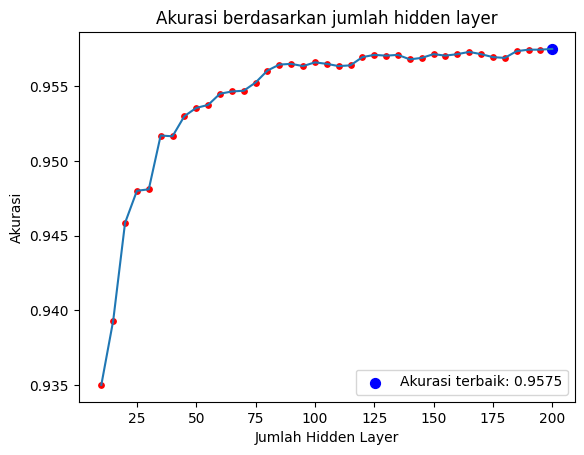

In [ ]:
# Membuat plot

# Judul plot
plt.title('Akurasi berdasarkan jumlah hidden layer')

# Membuat scatter plot dan line plot
plt.scatter(*zip(*hasil),  color='red', s=15)
plt.plot(*zip(*hasil))

# Label sumbu x dan y
plt.xlabel('Jumlah Hidden Layer')
plt.ylabel('Akurasi')

# Menambahkan label pada titik dengan akurasi terbaik
highest_index = max(range(len(hasil)), key=lambda i: hasil[i][1])
plt.scatter(hasil[highest_index][0], hasil[highest_index][1], color='blue', s=50, label=f'Akurasi terbaik: {hasil[highest_index][1]}')

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()